# 1) Explanatory data analysis

## Importing, cleaning and transforming the data

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Resistance data

In [3]:
resistance_data = pd.read_csv('antibio_dataset/resist.csv')

In [4]:
resistance_data.shape

(3786, 4)

In [5]:
resistance_data

,Sample_ID,azm_sr,cip_sr,cfx_sr
0,ERR1549286,1.0,NaN,NaN
1,ERR1549290,1.0,NaN,NaN
2,ERR1549291,1.0,NaN,NaN
3,ERR1549287,1.0,NaN,NaN
4,ERR1549288,1.0,NaN,NaN
...,...,...,...,...
3781,ERR2172350,1.0,NaN,NaN
3782,ERR2172351,1.0,NaN,NaN
3783,ERR2172352,1.0,NaN,NaN
3784,ERR2172353,1.0,NaN,NaN


In [6]:
resistance_data.dtypes

Sample_ID     object
azm_sr       float64
cip_sr       float64
cfx_sr       float64
dtype: object

Missing values per column:

In [7]:
resistance_data.isna().sum()

Sample_ID      0
azm_sr       308
cip_sr       698
cfx_sr       385
dtype: int64

Proportion of missing values per column:

In [8]:
resistance_data.isna().sum() / len(resistance_data)

Sample_ID    0.000000
azm_sr       0.081352
cip_sr       0.184363
cfx_sr       0.101690
dtype: float64

Although the share of missing values per column is not significantly high, one would still aim to keep as much data points as possible for the prediction analysis. Thus imputation of missing values would be a possible step but in this case the authors hold no information about the biological similarity of the samples. Not being certain if Sample_ID string similarity would also translate into biological dimilarity between the samples, authors decided not to impute the missing values without additional similarity measures and omit the samples that have missing values from the analysis entirely.

In [9]:
azithromycin_res = resistance_data[resistance_data['azm_sr'].isna() != True][['Sample_ID','azm_sr']]
cefixime_res = resistance_data[resistance_data['cfx_sr'].isna() != True][['Sample_ID','cfx_sr']]
ciprofloxacin_res = resistance_data[resistance_data['cip_sr'].isna() != True][['Sample_ID','cip_sr']]

In [10]:
print(f"Azithromycin: {azithromycin_res.shape[0]} samples")
print(f"Cefixime: {cefixime_res.shape[0]} samples")
print(f"Ciprofloxacin: {ciprofloxacin_res.shape[0]} samples")

Azithromycin: 3478 samples
Cefixime: 3401 samples
Ciprofloxacin: 3088 samples


### K-mer data

In [11]:
kmers_azithromycin = pd.read_csv('antibio_dataset/kmers_azithromycin.tsv', sep="\t")
kmers_cefixime = pd.read_csv('antibio_dataset/kmers_cefixime.tsv', sep="\t")
kmers_ciprofloxacin = pd.read_csv('antibio_dataset/kmers_ciprofloxacin.tsv', sep="\t")

In [12]:
kmers_azithromycin.head()

,pattern_id,ERR1549286,ERR1549290,ERR1549291,ERR1549287,ERR1549288,ERR1549299,ERR1549292,ERR1549298,ERR1549296,...,ERR2172345,ERR2172346,ERR2172347,ERR2172348,ERR2172349,ERR2172350,ERR2172351,ERR2172352,ERR2172353,ERR2172354
0,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,TACCGTAACCGGCAATGCGGATATTACGGTC,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
3,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In order to merge the information of the resistance data tables and k-mer data tables, the k-mer tables need to be transposed (sample IDs in rows and patterns in columns).

In [13]:
# Azithromycin

kmers_azithromycin = kmers_azithromycin.transpose()

# Making the first row of the transposed DataFrame as column headers
new_header = kmers_azithromycin.iloc[0]
kmers_azithromycin = kmers_azithromycin[1:] 
kmers_azithromycin.columns = new_header

# Making the structure of column names similar to the structure of resistance tables
kmers_azithromycin = kmers_azithromycin.reset_index()
kmers_azithromycin = kmers_azithromycin.rename(columns={'index': 'Sample_ID'})
kmers_azithromycin.index.name = None

In [14]:
# Cefixime

kmers_cefixime = kmers_cefixime.transpose()

# Making the first row of the transposed DataFrame as column headers
new_header = kmers_cefixime.iloc[0]
kmers_cefixime = kmers_cefixime[1:] 
kmers_cefixime.columns = new_header

# Making the structure of column names similar to the structure of resistance tables
kmers_cefixime = kmers_cefixime.reset_index()
kmers_cefixime = kmers_cefixime.rename(columns={'index': 'Sample_ID'})
kmers_cefixime.index.name = None

In [15]:
# Ciprofloxacin

kmers_ciprofloxacin = kmers_ciprofloxacin.transpose()

# Making the first row of the transposed DataFrame as column headers
new_header = kmers_ciprofloxacin.iloc[0]
kmers_ciprofloxacin = kmers_ciprofloxacin[1:] 
kmers_ciprofloxacin.columns = new_header

# Making the structure of column names similar to the structure of resistance tables
kmers_ciprofloxacin = kmers_ciprofloxacin.reset_index()
kmers_ciprofloxacin = kmers_ciprofloxacin.rename(columns={'index': 'Sample_ID'})
kmers_ciprofloxacin.index.name = None

## Merging the data

In [16]:
azithromycin_data = kmers_azithromycin.merge(azithromycin_res, how = 'right', on = 'Sample_ID')
cefixime_data = kmers_cefixime.merge(cefixime_res, how = 'right', on = 'Sample_ID')
ciprofloxacin_data = kmers_ciprofloxacin.merge(ciprofloxacin_res, how = 'right', on = 'Sample_ID')

In [17]:
print("Shape of azithromycin data:", azithromycin_data.shape)
print("Shape of cefixime data:", cefixime_data.shape)
print("Shape of ciprofloxacin data:", ciprofloxacin_data.shape)

Shape of azithromycin data: (3478, 517)
Shape of cefixime data: (3401, 386)
Shape of ciprofloxacin data: (3088, 8875)


In [18]:
azithromycin_data.head()

,Sample_ID,CTTAACATATTTGCCTTTGATTTTTGAAGAAGCTGCCACGCCGGCAG,TACCGTAACCGGCAATGCGGATATTACGGTC,CAGACGGCATTTTTTTTGCGTTTTTCGGGAGG,AACGGGTTTTCAGACGGCATTCGATATCGGGACG,CCAAAAATTACCCGCGTTGACGTAGCTAAAGA,CGGACCGGTATTCCGTCGAAATCACCGCCGTCAACCGCCCC,TGAAATTGTCCATCTCGTATGCCGTCTTCTGCTTG,"TACGGTATTGTCCGCATTATTAAACTCAAAACC,AGAAGACGGCATACGAGATGGACAATTTCATCC",GGCATTTTTTTTGCGTTTTTCGGGAGGGGGCGGC,...,CTGCTGGACAAAAAAGGGATTAAAGATATCACC,CGTTCCTTTCGGCGTATTCTCGCCGTTGCGCGGCG,TCACATTTCCGCTTCAGACGGCATCCGATATGA,GAAGCTGCCACGCCGGCAGAAGTGTTGTTTGCGGG,ACGCCGAAAGGAACGTGTATGCTGCCGCCCAACTGCG,ACTCGAATTTTGCAGGATTGGTATCAATGGCGATAATGCGACCGGCTTTGG,"ACCCGGCCCGGGCTGGCAGGCTACGGCTACACCGGTATCC,CACCTTAGGGAATCGTTCCCTTTGGGCCGGG,TACGCCGAAAGGAACGTGTATGCTGCCGCCC,GGGATTGTTGATTGTCGGACTGTTGTGCAACCTC",AGCCTGATTCACCAATGGTTTGTTCATAACAA,TTTTGAGCAGAAAGCAGTCAAAAACAGGGGGATTTTGCCCTTTTGACAGGTTCGAGTGCCG,azm_sr
0,ERR1549286,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
1,ERR1549290,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
2,ERR1549291,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
3,ERR1549287,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0
4,ERR1549288,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,1,1,1,1.0


## Visualising the frequency of different k-mers

In [19]:
azithromycin_column_sums = np.sum(azithromycin_data.iloc[:,1:-1], axis=0)
cefixime_column_sums = np.sum(cefixime_data.iloc[:,1:-1], axis=0)
ciprofloxacin_column_sums = np.sum(ciprofloxacin_data.iloc[:,1:-1], axis=0)

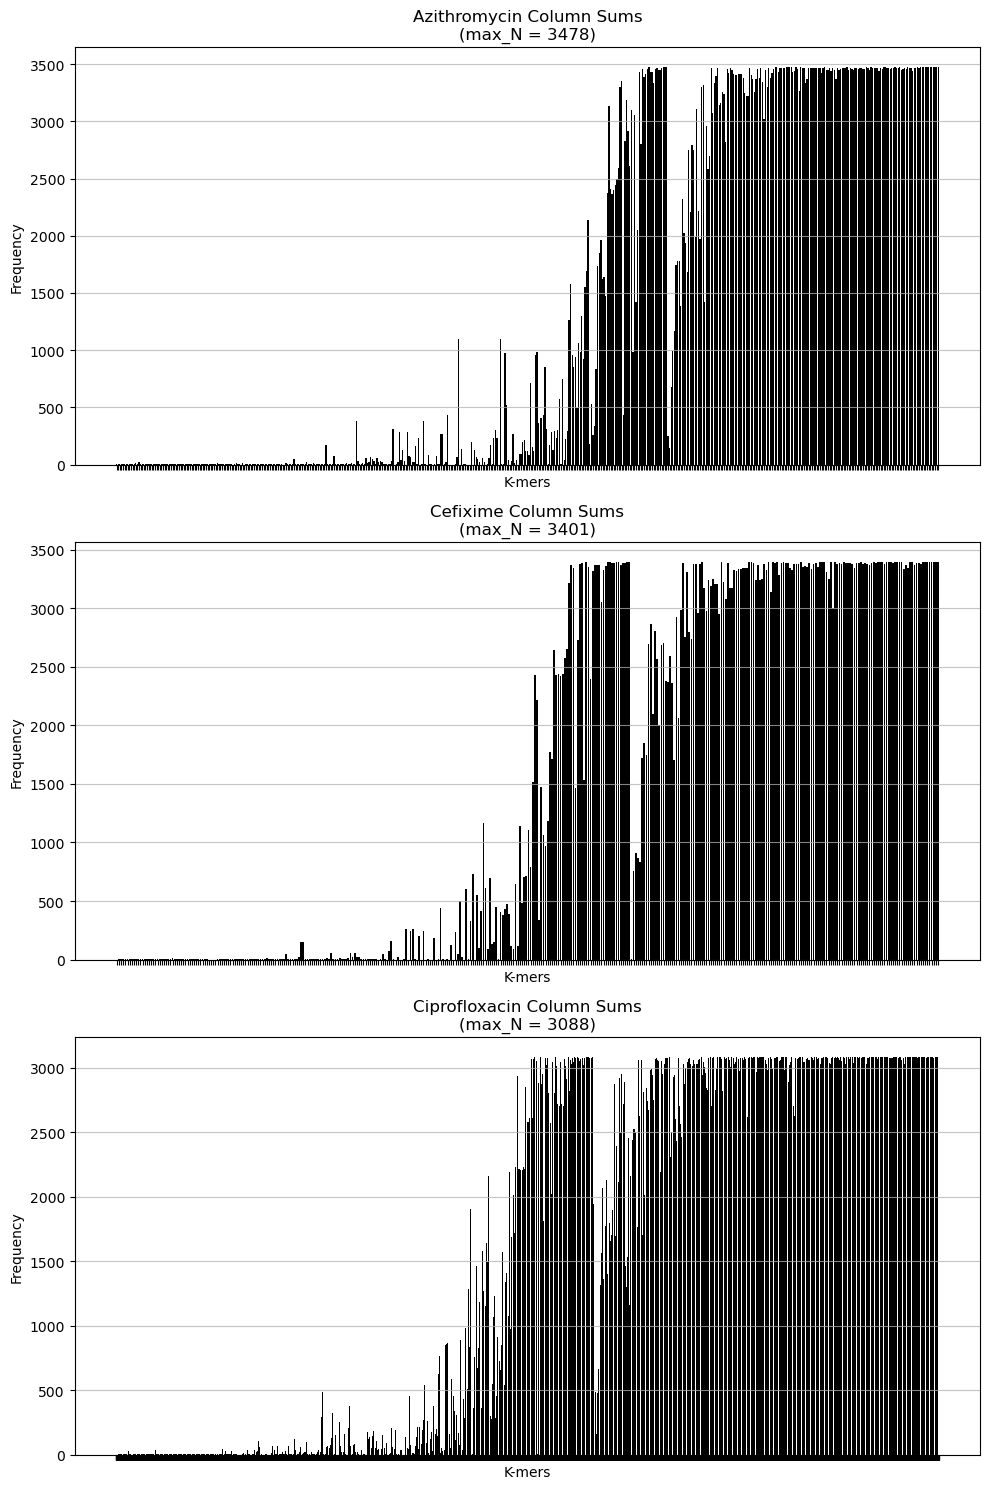

In [20]:
# Plotting histograms
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

axs[0].bar(azithromycin_data.iloc[:,1:-1].columns , azithromycin_column_sums, color = 'black')
axs[0].set_title(f'Azithromycin Column Sums\n(max_N = {len(azithromycin_data)})')
axs[0].set_xlabel('K-mers')
axs[0].set_ylabel('Frequency')
axs[0].grid(axis='y', alpha=0.75)
axs[0].tick_params(axis='x', labelbottom=False)

axs[1].bar(cefixime_data.iloc[:,1:-1].columns , cefixime_column_sums, color = 'black')
axs[1].set_title(f'Cefixime Column Sums\n(max_N = {len(cefixime_data)})')
axs[1].set_xlabel('K-mers')
axs[1].set_ylabel('Frequency')
axs[1].grid(axis='y', alpha=0.75)
axs[1].tick_params(axis='x', labelbottom=False)

axs[2].bar(ciprofloxacin_data.iloc[:,1:-1].columns , ciprofloxacin_column_sums, color = 'black')
axs[2].set_title(f'Ciprofloxacin Column Sums\n(max_N = {len(ciprofloxacin_data)})')
axs[2].set_xlabel('K-mers')
axs[2].set_ylabel('Frequency')
axs[2].grid(axis='y', alpha=0.75)
axs[2].tick_params(axis='x', labelbottom=False)

plt.tight_layout()
plt.show()

There are k-mers that appear in almost all samples, and there are kmers that appear in almost none of them. We will use this finding for the feature selection part.

## Checking class balance

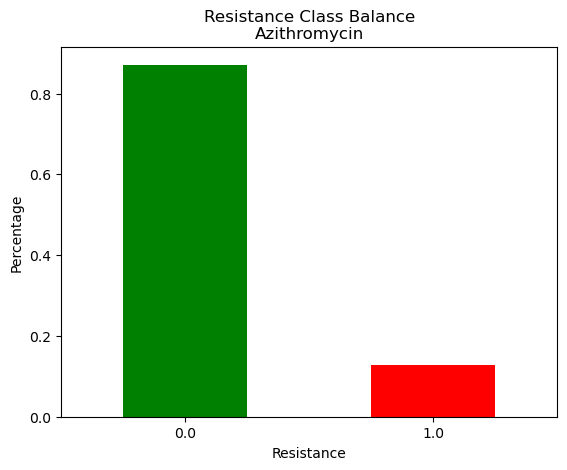

In [24]:
# Azithromycin
azithromycin_data.iloc[:, -1].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Resistance Class Balance\nAzithromycin')
plt.xlabel('Resistance')
plt.tick_params(axis='x', labelrotation = 0)
plt.ylabel('Percentage')
plt.show()

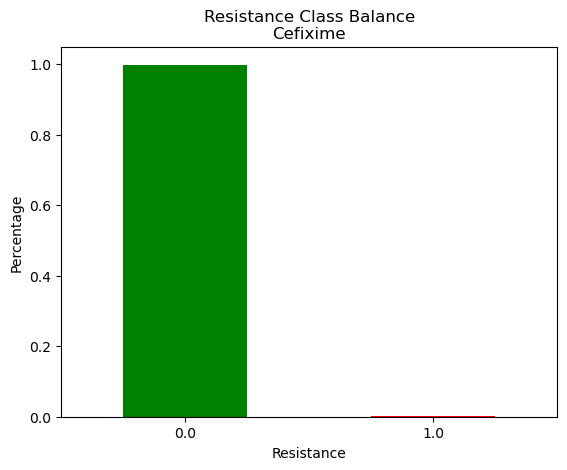

In [25]:
# Cefixime
cefixime_data.iloc[:, -1].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Resistance Class Balance\nCefixime')
plt.xlabel('Resistance')
plt.tick_params(axis='x', labelrotation = 0)
plt.ylabel('Percentage')
plt.show()

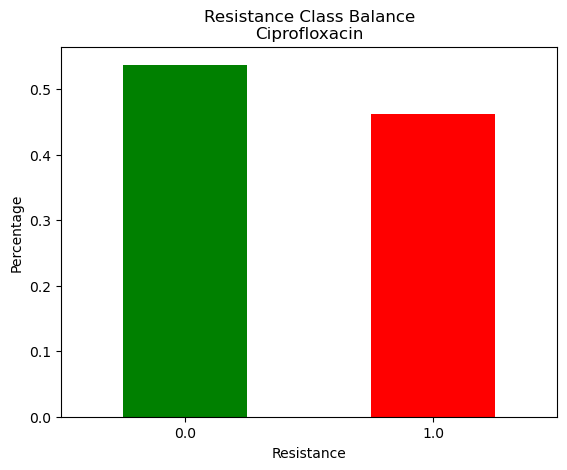

In [26]:
# Ciprofloxacin
ciprofloxacin_data.iloc[:, -1].value_counts(normalize=True).plot(kind='bar', color=['green', 'red'])
plt.title('Resistance Class Balance\nCiprofloxacin')
plt.xlabel('Resistance')
plt.tick_params(axis='x', labelrotation = 0)
plt.ylabel('Percentage')
plt.show()

We can observe, that the data for Azithromycin and Cefixime is very imbalanced. We will need to take this into consideration for model training and selection.

# 2) Feature selection

First we split the data into the feature matrix and target vector.

In [27]:
X_azithromycin = azithromycin_data.iloc[:, :-1] 
y_azithromycin = azithromycin_data.iloc[:, -1]

X_cefixime = cefixime_data.iloc[:, :-1]
y_cefixime = cefixime_data.iloc[:, -1]

X_ciprofloxacin = ciprofloxacin_data.iloc[:, :-1]
y_ciprofloxacin = ciprofloxacin_data.iloc[:, -1]

We only keep the k-mers that are not present or absent in almost all samples.

In [28]:
# Function that deletes columns corresponding to k-mers that appear in more than l% or less than u% of the samples
def delete_columns(df, u, l):
    cols_to_remove = []
    for col in df.columns[1:]:
        col_sum = df[col].sum()
        if (col_sum > (len(df) * u)) | (col_sum < (len(df) * l)): 
            cols_to_remove.append(col)
    df_selected = df.drop(columns=cols_to_remove)
    return df_selected

In [29]:
X_azithromycin_selected = delete_columns(X_azithromycin, 0.95, 0.05)
X_cefixime_selected = delete_columns(X_cefixime, 0.95, 0.05)
X_ciprofloxacin_selected = delete_columns(X_ciprofloxacin, 0.8, 0.2)

# 3) Modelling

First we split the data intro train and test sets.

In [32]:
from sklearn.model_selection import train_test_split

# Split the data into train and test sets
X_train_azithromycin, X_test_azithromycin, y_train_azithromycin, y_test_azithromycin = train_test_split(X_azithromycin_selected.iloc[:, 1:], y_azithromycin, test_size=0.3, random_state=42)
X_train_cefixime, X_test_cefixime, y_train_cefixime, y_test_cefixime = train_test_split(X_cefixime_selected.iloc[:, 1:], y_cefixime, test_size=0.3, random_state=42)
X_train_ciprofloxacin, X_test_ciprofloxacin, y_train_ciprofloxacin, y_test_ciprofloxacin = train_test_split(X_ciprofloxacin_selected.iloc[:, 1:], y_ciprofloxacin, test_size=0.3, random_state=42)

## Linear SVM

#### Azithromycin

In [47]:
from sklearn.svm import SVC

model_azithromycin = SVC(kernel='linear')
model_azithromycin.fit(X_train_azithromycin, y_train_azithromycin)

y_pred_train_azithromycin = model_azithromycin.predict(X_train_azithromycin)
y_pred_test_azithromycin = model_azithromycin.predict(X_test_azithromycin)

#### Cefixime

In [48]:
model_cefixime = SVC(kernel='linear')
model_cefixime.fit(X_train_cefixime, y_train_cefixime)

y_pred_train_cefixime = model_cefixime.predict(X_train_cefixime)
y_pred_test_cefixime = model_cefixime.predict(X_test_cefixime)

#### Ciprofloxacin

In [49]:
model_ciprofloxacin = SVC(kernel='linear')
model_ciprofloxacin.fit(X_train_ciprofloxacin, y_train_ciprofloxacin)

y_pred_train_ciprofloxacin = model_ciprofloxacin.predict(X_train_ciprofloxacin)
y_pred_test_ciprofloxacin = model_ciprofloxacin.predict(X_test_ciprofloxacin)

# 4) Performance evaluation

#### Azithromycin

In [50]:
from sklearn.metrics import accuracy_score as acc

accuracy_train_azithromycin = acc(y_pred_train_azithromycin, y_train_azithromycin)
accuracy_test_azithromycin = acc(y_pred_test_azithromycin, y_test_azithromycin)

print(f"Accuray on training set: {accuracy_train_azithromycin} ")
print(f"Accuray on test set: {accuracy_test_azithromycin} ")

Accuray on training set: 0.9753492193919474 
Accuray on test set: 0.9636015325670498 


In [51]:
from sklearn.metrics import cohen_kappa_score

cohen_kappa_azithromycin = cohen_kappa_score(y_test_azithromycin, y_pred_test_azithromycin)

print(f"Cohen's Kappa: {cohen_kappa_azithromycin}")

Cohen's Kappa: 0.8383584862609603


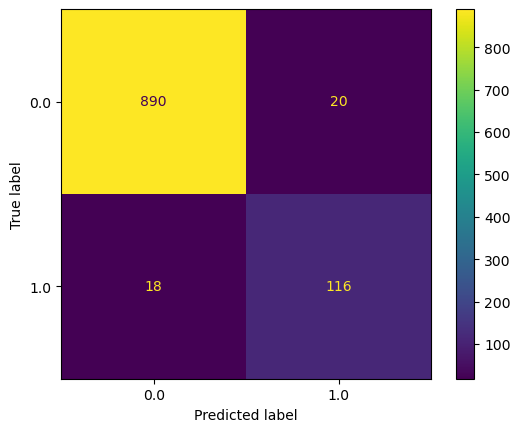

In [52]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_estimator(model_azithromycin, X_test_azithromycin, y_test_azithromycin)

#### Cefixime

In [53]:
accuracy_train_cefixime = acc(y_pred_train_cefixime, y_train_cefixime)
accuracy_test_cefixime = acc(y_pred_test_cefixime, y_test_cefixime)

print(f"Accuray on training set: {accuracy_train_cefixime} ")
print(f"Accuray on test set: {accuracy_test_cefixime} ")

Accuray on training set: 0.9983193277310924 
Accuray on test set: 0.9990205680705191 


In [54]:
cohen_kappa_cefixime = cohen_kappa_score(y_test_cefixime, y_pred_test_cefixime)

print(f"Cohen's Kappa: {cohen_kappa_cefixime}")

Cohen's Kappa: 0.0


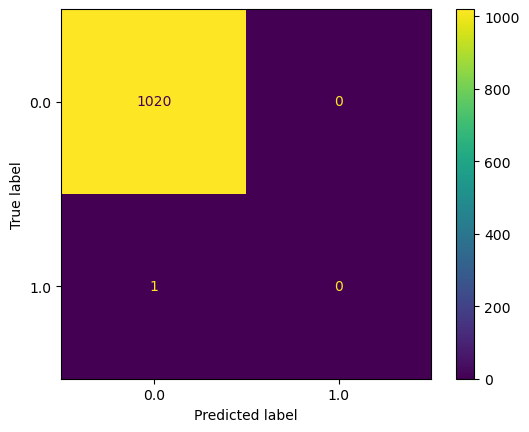

In [55]:
ConfusionMatrixDisplay.from_estimator(model_cefixime, X_test_cefixime, y_test_cefixime)

#### Ciprofloxacin

In [56]:
accuracy_train_ciprofloxacin = acc(y_pred_train_ciprofloxacin, y_train_ciprofloxacin)
accuracy_test_ciprofloxacin = acc(y_pred_test_ciprofloxacin, y_test_ciprofloxacin)

print(f"Accuray on training set: {accuracy_train_ciprofloxacin} ")
print(f"Accuray on test set: {accuracy_test_ciprofloxacin} ")

Accuray on training set: 0.999537251272559 
Accuray on test set: 0.9546925566343042 


In [57]:
cohen_kappa_ciprofloxacin = cohen_kappa_score(y_test_ciprofloxacin, y_pred_test_ciprofloxacin)

print(f"Cohen's Kappa: {cohen_kappa_ciprofloxacin}")

Cohen's Kappa: 0.9084302325581395


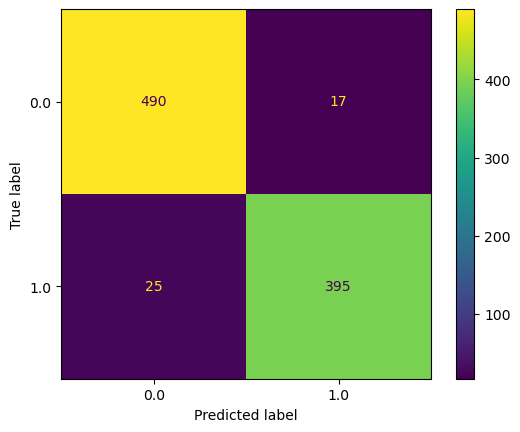

In [58]:
ConfusionMatrixDisplay.from_estimator(model_ciprofloxacin, X_test_ciprofloxacin, y_test_ciprofloxacin)